## imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# scikit
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
import time

## carga de datos

In [2]:
#  CARGA DATAFRAME ATRIBUTOS
df_atributos = pd.read_excel('dfAtributosNormalizado2_-EstructuraFinal0dias.xlsx.xlsx').drop('Unnamed: 0',axis=1)
df_atributos.head()

,index_0,mlotst_0,zos_0,bottomT_0,thetao_0,so_0,uo_0,vo_0,Profundidad_izq_1_0,mlotst_izq_1_0,...,uo_inf_2.1_10,vo_inf_2.1_10,Profundidad_inf_2.2_10,mlotst_inf_2.2_10,zos_inf_2.2_10,bottomT_inf_2.2_10,thetao_inf_2.2_10,so_inf_2.2_10,uo_inf_2.2_10,vo_inf_2.2_10
0,0.243295,0.320132,0.480473,0.173296,0.110521,0.572432,0.524528,0.388423,0,0.288889,...,0.592857,0.502732,0,0.310670,0.363342,0.900723,0.146416,0.370817,0.482168,0.416797
1,0.013410,0.102310,0.362130,0.342146,0.060774,0.601351,0.762264,0.378356,0,0.000000,...,0.521429,0.459624,0,0.007554,0.297035,0.808179,0.009041,0.385877,0.375178,0.455399
2,0.241379,0.320132,0.480473,0.173296,0.110440,0.572432,0.566038,0.440436,0,0.004444,...,0.670238,0.539769,0,0.113314,0.445822,0.295052,0.807272,0.754016,0.559201,0.453312
3,0.283525,0.339934,0.356805,0.414651,0.166385,0.556757,0.516981,0.432886,0,0.140000,...,0.507143,0.660595,0,0.192635,0.266846,0.318156,0.505854,0.666332,0.544936,0.383933
4,0.289272,0.339934,0.284615,0.397160,0.141753,0.555946,0.427673,0.402685,0,0.140000,...,0.464286,0.647845,0,0.191690,0.237736,0.253599,0.225771,0.628515,0.333809,0.525822


In [3]:
#  CARGA DATAFRAME AVISTAMIENTOS
df_avistamientos = pd.read_excel('dfAvistamientos.xlsx').drop('Unnamed: 0',axis=1)
df_avistamientos.head()

,Avistamientos
0,1
1,1
2,1
3,20
4,151


In [29]:
# DATAFRAMES A LISTAS
listado_atributos = df_atributos.values.tolist()
listado_avistamientos = df_avistamientos.values.tolist()
# CONJUNTOS DE ENTRENAMIENTO Y TEST
atributos_train, atributos_test, avistamientos_train, avistamientos_test = train_test_split(listado_atributos,listado_avistamientos,test_size=0.2)
atributos_train = np.array(atributos_train)
atributos_test = np.array(atributos_test)
avistamientos_train = np.ravel(np.array(avistamientos_train))
avistamientos_test = np.ravel(np.array(avistamientos_test))
type(avistamientos_train)

numpy.ndarray

In [5]:
def imprimir(mod,X_test,Y_test,Y_prediccion):
    # COEFICIENTES (pendientes)
    print('Coeficientes:')
    print(mod.coef_)
    print(mod.intercept_)
    # The mean squared error
    print('Error cuadrático medio: %.2f'% mean_squared_error(Y_test, Y_prediccion))
    # The coefficient of determination: 1 is perfect prediction
    print('Coeficiente de determinación con datos test: %.2f'% mod.score(X_test, Y_test)) 
    print('Coeficiente de determinación con datos train: %.2f'% mod.score(atributos_train, avistamientos_train)) 
    print(r2_score(Y_test, Y_prediccion))

    plt.plot(Y_test,'r')
    plt.plot(Y_prediccion,'g')
    plt.show()
    
    # datos que teniamos y los uqe hemos obtenido
    # [print(Y_test[i],Y_pred[i]) for i in range(len(Y_pred))]

### Regresion Lineal
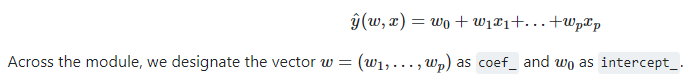

In [6]:
# REGRESION LINEAL
lr = linear_model.LinearRegression()
# se entrena al modelo
lr.fit(atributos_train,avistamientos_train)
# prediccion
avistamientos_prediccion_lineal = lr.predict(atributos_test)

In [7]:
scores_regr = mean_squared_error(avistamientos_test, avistamientos_prediccion_lineal)
scores_regr

137964.37608665373

Coeficientes:
[-1.00975102e+12 -1.54156371e+15  6.39789232e+14  8.92480198e+14
  1.29473993e+03 -2.74296820e+03  2.85318318e+03 -1.68012669e+03
 -1.55055968e+14  3.49004227e+14  3.05548749e+14  6.31430019e+13
  4.43943750e+03  2.40029688e+03 -9.71482227e+03 -2.06320898e+03
  5.00931857e+13 -3.03045773e+13 -2.87287433e+13  1.54357961e+14
 -1.39606250e+03  1.91621484e+03 -8.82325000e+03  5.99243750e+03
 -5.70767123e+13 -3.89898012e+13 -9.59655293e+13  3.94555781e+13
  5.72565625e+03 -1.65219141e+03  6.23525781e+03 -8.51700781e+03
 -4.12917275e+12 -1.45103436e+13  1.08848689e+13  1.83477103e+12
 -6.40376562e+03 -4.28312500e+03  5.94016406e+03  7.71406250e+02
  3.21327417e+13 -2.89221038e+13  1.09632191e+13  1.08301664e+13
 -2.35728125e+03 -3.02393750e+03  1.11140625e+02  1.40818750e+03
  4.13069659e+13 -3.46601648e+12  8.48705927e+12 -1.19988855e+13
 -2.92298438e+04  3.71116406e+03  9.46906250e+03  2.11761914e+04
 -2.22866018e+13 -1.44225975e+13  7.95947594e+12  3.03205766e+12
  1.8480562

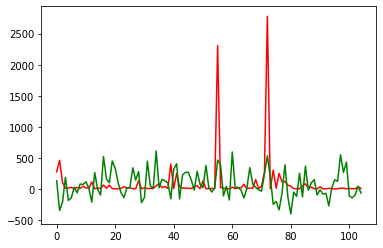

In [8]:
imprimir(lr,atributos_test,avistamientos_test,avistamientos_prediccion_lineal)

### Polinomial

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(atributos_train,avistamientos_train)

model.named_steps['linear'].coef_

avistamientos_pred_pol = model.predict(atributos_test)


KeyboardInterrupt: 

In [ ]:
print(model.score(atributos_test,avistamientos_test))
plt.plot(avistamientos_test,'r')
plt.plot(avistamientos_pred_pol,'g')
plt.show()

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_rf = rf.predict(atributos_test)
rf.score(atributos_test,avistamientos_test)

0.21058732570110938

In [11]:
rf = RandomForestRegressor(n_estimators=1000,max_features=3,max_depth=100)
rf.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_rf = rf.predict(atributos_test)
rf.score(atributos_test,avistamientos_test)

0.17793253494897532

In [31]:
## RandomizedSearchCV
inicio = time.time()
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 500),
                       'max_depth': randint(1, 100),
                      'max_features': randint(1,atributos_train.shape[1])}

busqueda = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=2,
                            param_distributions=param_distributions,
                            random_state=0)
busqueda.fit(atributos_train, avistamientos_train)




print(busqueda.best_params_)



# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
busqueda.score(atributos_test, avistamientos_test)
fin= time.time()
print('tiempor requerido {} minutos'.format((fin-inicio)/60))
busqueda.best_score_

{'max_depth': 45, 'max_features': 48, 'n_estimators': 118}
tiempor requerido 0.9289317766825358 minutos


0.13117388205168287

In [13]:
print(busqueda.score(atributos_test, avistamientos_test))
busqueda.best_index_

0.1897852227619493


60

In [14]:
rf = RandomForestRegressor(n_estimators=183,max_features=1,max_depth=81)
rf.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_rf = rf.predict(atributos_test)
rf.score(atributos_test,avistamientos_test)

0.1684101676121953

0.16891884653100142


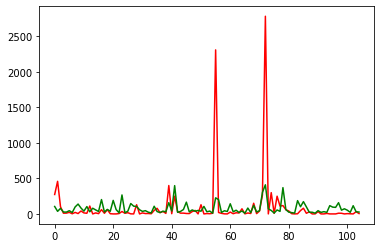

In [15]:
rf = RandomForestRegressor(n_estimators=183,max_features=1,max_depth=81)
rf.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_rf = rf.predict(atributos_test)
print(rf.score(atributos_test,avistamientos_test)
)
plt.plot(avistamientos_test,'r')
plt.plot(avistamientos_prediccion_rf,'g')
plt.show()

### Vecino más cercano

In [ ]:

neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_vecinos = neigh.predict(atributos_test)
print(neigh.score(atributos_test,avistamientos_test))

plt.plot(avistamientos_test,'r')
plt.plot(avistamientos_prediccion_vecinos,'g')
plt.show()
# [print('{} - {}'.format(avistamientos_test[i],avistamientos_prediccion_vecinos[i])) for i in range(len(avistamientos_test))]

In [49]:


k_range=list(range(1,atributos_train.shape[1]))
# options=['uniform', 'distance']

#specify "parameter distribution" rather than "parameter grid"
param_grid=dict(n_neighbors=k_range)

knn=KNeighborsRegressor()
# rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand = RandomizedSearchCV(knn, param_grid, n_iter=100, random_state=10)
rand.fit(atributos_train,avistamientos_train)
rand.best_score_

0.2774038463256684

### SVM

In [ ]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_svm = svm_reg.predict(atributos_test)
print(svm_reg.score(atributos_test,avistamientos_test))

plt.plot(avistamientos_test,'r')
plt.plot(avistamientos_prediccion_svm,'g')
plt.show()

### arboles de decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor(max_depth= 50 )

dectree.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_dectree = dectree.predict(atributos_test)
print(dectree.score(atributos_test,avistamientos_test))

plt.plot(avistamientos_test,'r')
plt.plot(avistamientos_prediccion_dectree,'g')
plt.show()